<a href="https://colab.research.google.com/github/ml2-picme/PicMe/blob/master/Image%20Download%20and%20Classification_moremodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Helper Functions

In [0]:
from keras.preprocessing.image import load_img, img_to_array
import urllib.request

def downloadFileFromUrl(URL, localPath):
  print("Lade ", URL, " nach ", localPath + " herunter")
  with urllib.request.urlopen(URL) as url:
    with open(localPath, 'wb') as f:
      f.write(url.read())
  load_img(localPath)

In [0]:
import os

def createLocalDirectory(dir):
  
  print("Erstelle lokales Verzeichnis:", dir, end='\t')
  
  try:  
    os.makedirs(dir)

  except OSError:  
    print (" - Failed")
  else:
    print(" - OK")

In [0]:
import os
import shutil

def deleteLocalFiles(dir):
  try:
    print("Delete local files", end='')  
    shutil.rmtree(dir) 
    print(" - OK")
  except OSError:
    print(" - Failed")

In [0]:
import os

def findFilesInPath(dir, extensions):

  files = []
  
  # r=root, d=directories, f = files
  for r, d, f in os.walk(dir):
    for file in f:
      for extension in extensions:
        if file.endswith(extension):
            files.append(os.path.join(r, file))
            break
            
  return files

In [0]:
from PIL import Image
import numpy as np

def prepareImagesForClassification(files, sizeX, sizeY):
  images = []
  
  for file in files:
    try:
      image = Image.open(file)
      image = image.resize((sizeX, sizeY), Image.LANCZOS)
      image = image.convert("RGB")
      
      image = np.asarray(image)
      images.append(image)
    except OSError:
      pass
  
  images = np.asarray(images)
  return images

In [0]:
def classifyImages(preparedImages, preprocess_input_function, decode_predictions_function, model):
  
  # preprocess the images to fit to the model
  images_preprocessed = preprocess_input_function(preparedImages)
  
  # use the model to classifi the images
  images_pred = model.predict(images_preprocessed, verbose=1)
  
  pred_results = decode_predictions_function(images_pred)
  
  return pred_results

In [0]:
import matplotlib.pyplot as plt

def printClassificationResults(images, predictedClasses):
  
  for i in range(len(images)):
    plt.figure()
    plt.imshow(images[i])
    plt.title(predictedClasses[i])
    plt.axis('off')
    
  plt.show()

In [0]:
def compareResults(fileNames, resulsList, modelList, threshold):
  
  for i in range(len(fileNames)):
    print("Comparing the Results for File: " + fileNames[i])
    
    for j in range(5):
      for k in range(len(modelList)):
        resultToPrint = resultsList[k][i][j]
        
        # Setze 5% als Threshold
        if(resultToPrint is not None and resultToPrint[2] > threshold):
          print(" > ", (j+1), ". Platz @ ", modelList[k], " : ", resultsList[k][i][j])
        else:
          print(" > ", (j+1), ". Platz @ ", modelList[k], " : ", "--- Threshold-Filter ---")
      
      print("=================================================================")
      
    print("")

## Logic

In [0]:
# Parameters
path = "/tmp/image_classification"
hashrange = 20

In [12]:
# Preparation: Delete local files
deleteLocalFiles(path)

Delete local files - OK


In [13]:
# Preparation: Create local directory structure
for i in range(hashrange):
  if(i % 10 == 0):
    parentPath = path + "/" + str((int)(i/10))
    createLocalDirectory(parentPath)
  normalizedI = '%02d' % i  # Normalization, pad zeroes
  filePath = parentPath + "/" + normalizedI
  createLocalDirectory(filePath)

Erstelle lokales Verzeichnis: /tmp/image_classification/0	 - OK
Erstelle lokales Verzeichnis: /tmp/image_classification/0/00	 - OK
Erstelle lokales Verzeichnis: /tmp/image_classification/0/01	 - OK
Erstelle lokales Verzeichnis: /tmp/image_classification/0/02	 - OK
Erstelle lokales Verzeichnis: /tmp/image_classification/0/03	 - OK
Erstelle lokales Verzeichnis: /tmp/image_classification/0/04	 - OK
Erstelle lokales Verzeichnis: /tmp/image_classification/0/05	 - OK
Erstelle lokales Verzeichnis: /tmp/image_classification/0/06	 - OK
Erstelle lokales Verzeichnis: /tmp/image_classification/0/07	 - OK
Erstelle lokales Verzeichnis: /tmp/image_classification/0/08	 - OK
Erstelle lokales Verzeichnis: /tmp/image_classification/0/09	 - OK
Erstelle lokales Verzeichnis: /tmp/image_classification/1	 - OK
Erstelle lokales Verzeichnis: /tmp/image_classification/1/10	 - OK
Erstelle lokales Verzeichnis: /tmp/image_classification/1/11	 - OK
Erstelle lokales Verzeichnis: /tmp/image_classification/1/12	 - OK
E

In [14]:
from urllib.request import urlopen

data = urlopen("https://raw.githubusercontent.com/ml2-picme/PicMe/master/input/images.txt")
for line in data:
  if not line.startswith(b'#'):  # Ignore Lines that begin with a comment (#)
    line = line.decode("utf-8").split("\n")[0]  # Normalization
    url = line.split(";")[0]
    label = line.split(";")[1]

    filename = url.split("/")[len(url.split("/")) - 1]
    
    hashvalue = abs(hash(filename)) % hashrange
    parent_dir = (int)(hashvalue / 10)
    hashvalue = '%02d' % hashvalue  # Normalization, pad zeroes

    print(url, " -> ", hashvalue, " -> ", label, " -> ", parent_dir, " -> ", filename)

    localPath = path + "/" + str(parent_dir) + "/" + hashvalue + "/" + filename

    downloadFileFromUrl(url, localPath)

https://www.tierpark-sababurg.de/fileadmin/_processed_/7/d/csm__MG_9788_852e2bbcb9.jpg  ->  17  ->  Wellensittich  ->  1  ->  csm__MG_9788_852e2bbcb9.jpg
Lade  https://www.tierpark-sababurg.de/fileadmin/_processed_/7/d/csm__MG_9788_852e2bbcb9.jpg  nach  /tmp/image_classification/1/17/csm__MG_9788_852e2bbcb9.jpg herunter
https://www.genussvoll-dampfen.de/images/product_images/original_images/popcorn.png  ->  18  ->  Popcorn  ->  1  ->  popcorn.png
Lade  https://www.genussvoll-dampfen.de/images/product_images/original_images/popcorn.png  nach  /tmp/image_classification/1/18/popcorn.png herunter
https://updated.de/media/cache/detailspage/cms/2018/02/maus-kaputt-tastatur-steuern.jpg  ->  17  ->  Tastatur  ->  1  ->  maus-kaputt-tastatur-steuern.jpg
Lade  https://updated.de/media/cache/detailspage/cms/2018/02/maus-kaputt-tastatur-steuern.jpg  nach  /tmp/image_classification/1/17/maus-kaputt-tastatur-steuern.jpg herunter
https://images.pickawood.com/data/nettece/aaa-images/customer-images/re

In [0]:
extensionsToCheck = [".jpg", ".png"]
foundFiles = findFilesInPath(path, extensionsToCheck)
preparedImages224x224 = prepareImagesForClassification(foundFiles, 224, 224)
preparedImages299x299 = prepareImagesForClassification(foundFiles, 299, 299)

In [0]:
from keras.applications import *

# Achtung: Hier werden Funktionen übergeben: 
# 1) preprocess_input Funktion
# 2) decode_predictions Funktion
# => Dies sorgt dafür, dass die gesamte Klassifizierung ausgelagert und dynamisch aufgerufen werden kann!

predictedClassesVGG16 = classifyImages(preparedImages224x224, vgg16.preprocess_input, vgg16.decode_predictions, vgg16.VGG16(input_shape=(224, 224, 3)))
predictedClassesVGG19 = classifyImages(preparedImages224x224, vgg19.preprocess_input, vgg19.decode_predictions, vgg19.VGG19(input_shape=(224, 224, 3)))
predictedClassesMobileNetV2 = classifyImages(preparedImages224x224, mobilenet_v2.preprocess_input, mobilenet_v2.decode_predictions, mobilenet_v2.MobileNetV2(input_shape=(224, 224, 3)))
predictedClassesResNet50 = classifyImages(preparedImages224x224, resnet50.preprocess_input, resnet50.decode_predictions, resnet50.ResNet50(input_shape=(224, 224, 3)))
predictedClassesDenseNet201 = classifyImages(preparedImages224x224, densenet.preprocess_input, densenet.decode_predictions, densenet.DenseNet201(input_shape=(224, 224, 3)))
predictedClassesInceptionV3 = classifyImages(preparedImages299x299, inception_v3.preprocess_input, inception_v3.decode_predictions, inception_v3.InceptionV3(input_shape=(299, 299, 3)))
predictedClassesXception = classifyImages(preparedImages299x299, xception.preprocess_input, xception.decode_predictions, xception.Xception(input_shape=(299, 299, 3)))
predictedClassesInceptionResNet = classifyImages(preparedImages299x299, inception_resnet_v2.preprocess_input, inception_resnet_v2.decode_predictions,inception_resnet_v2.InceptionResNetV2(input_shape=(299, 299, 3)))


22/22 [==============================] - 28s 1s/step


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


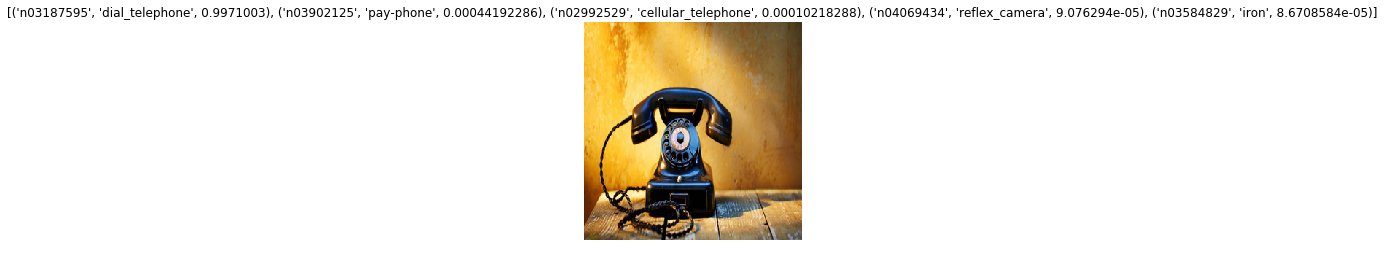

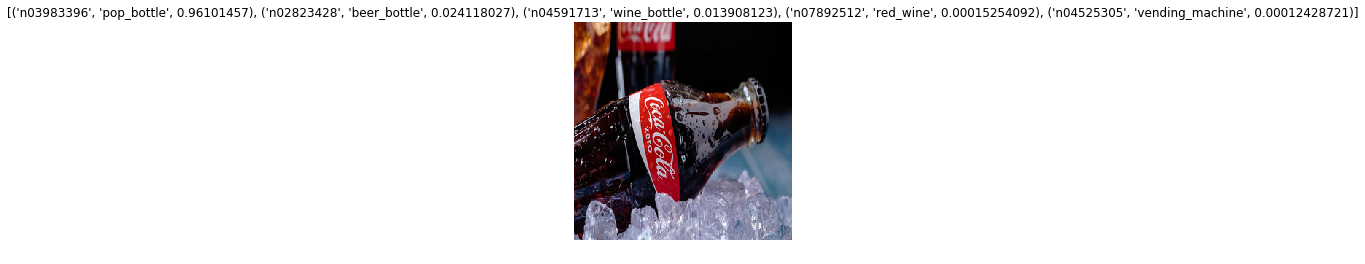

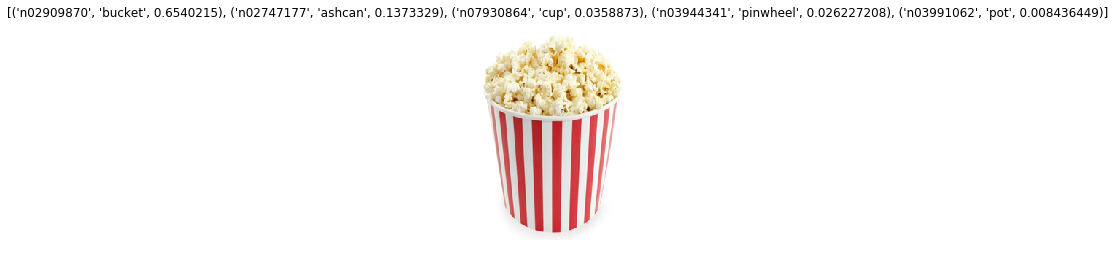

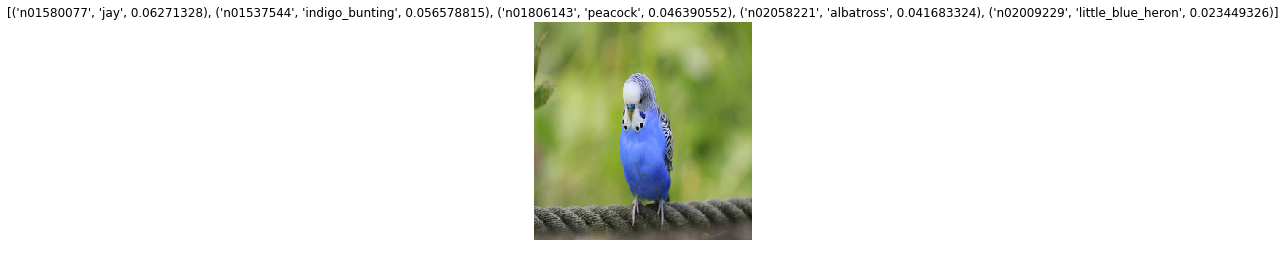

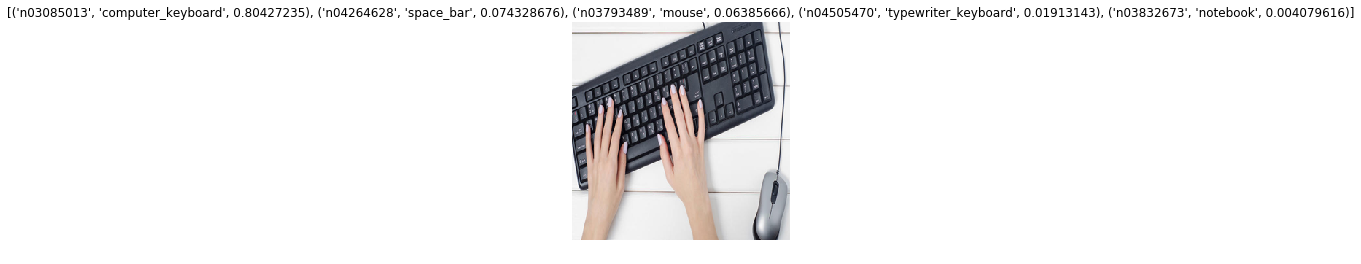

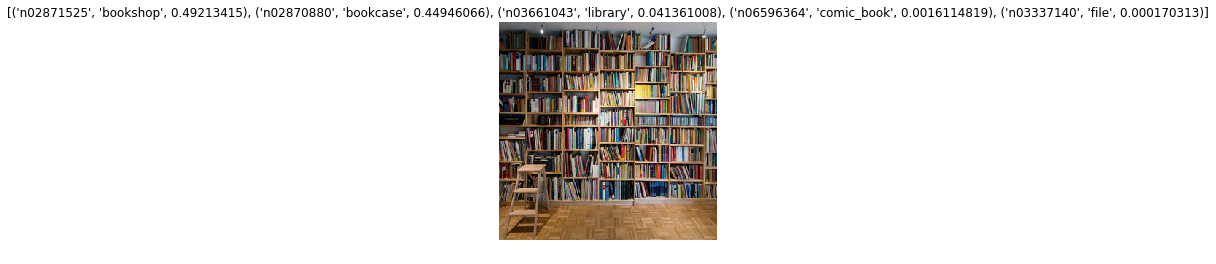

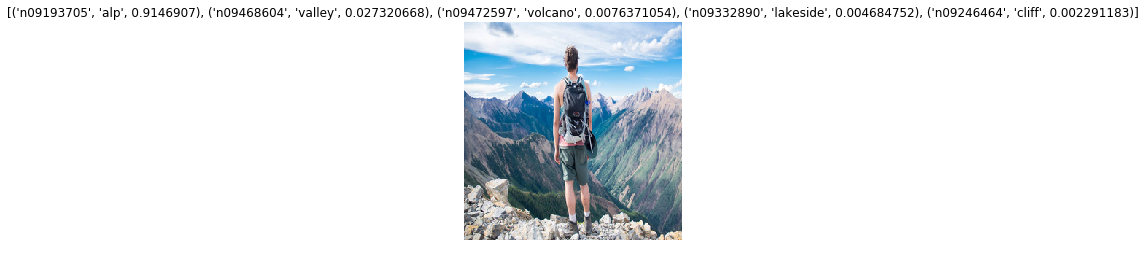

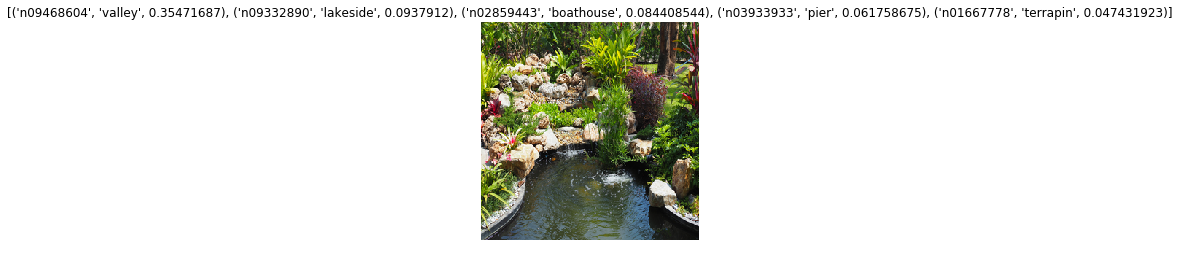

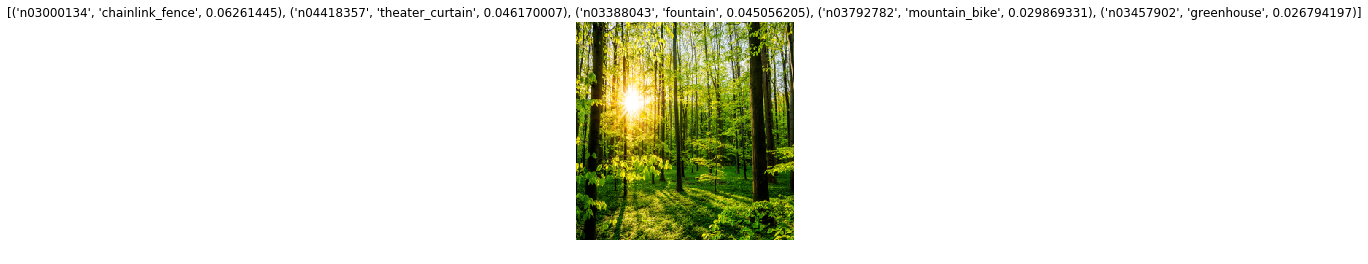

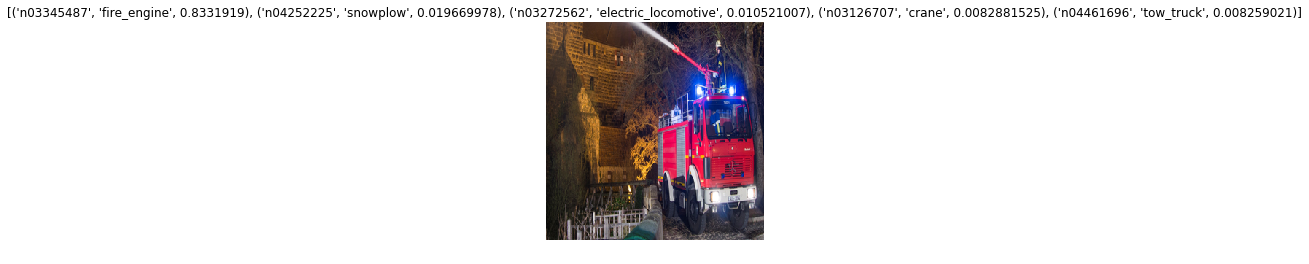

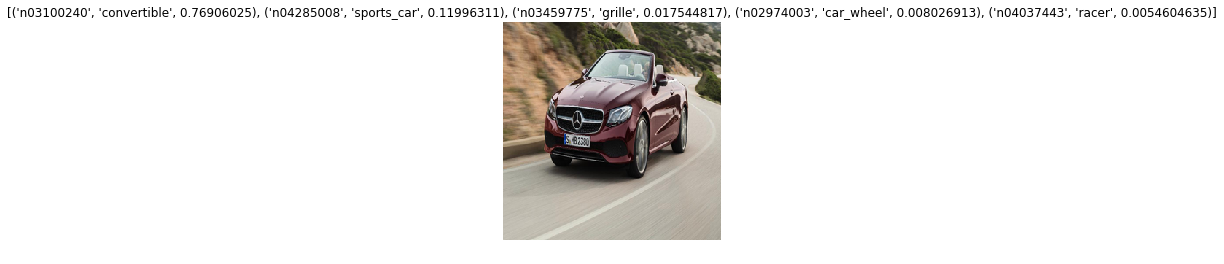

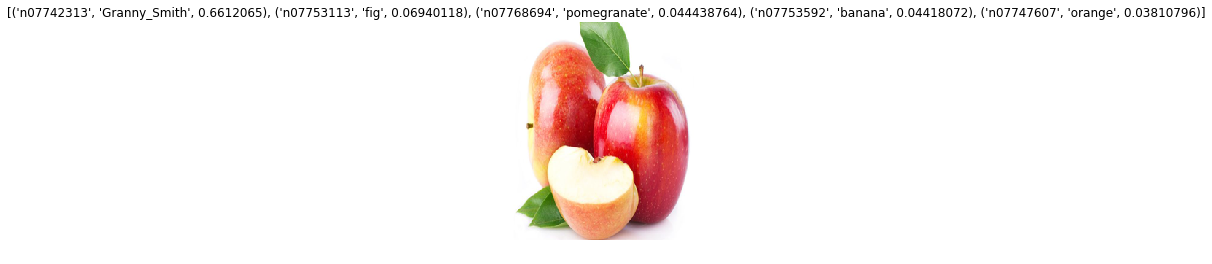

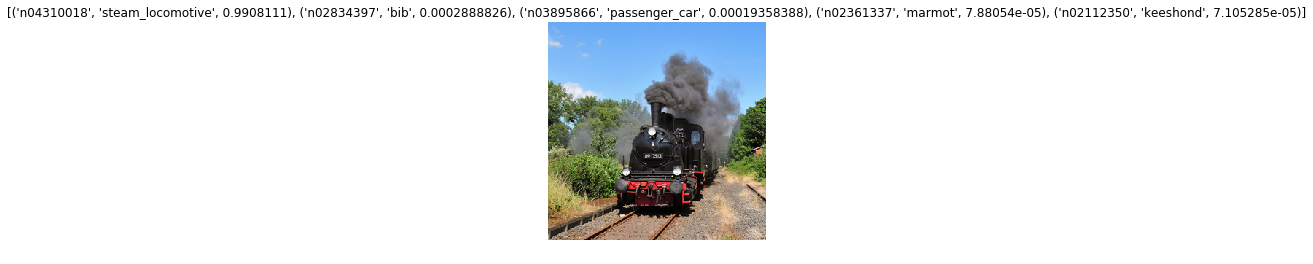

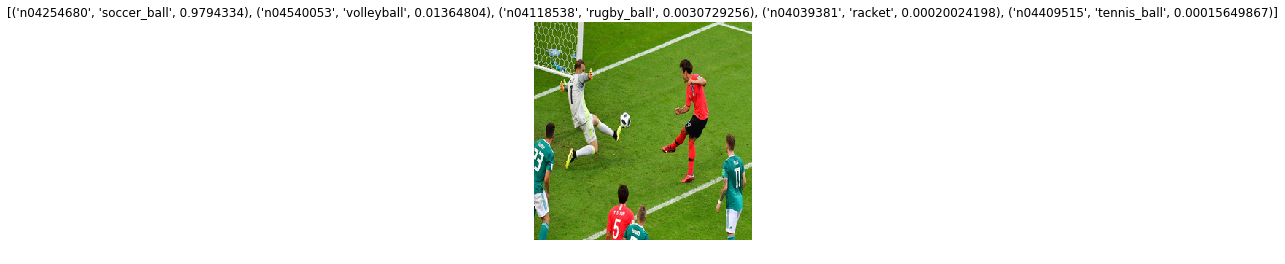

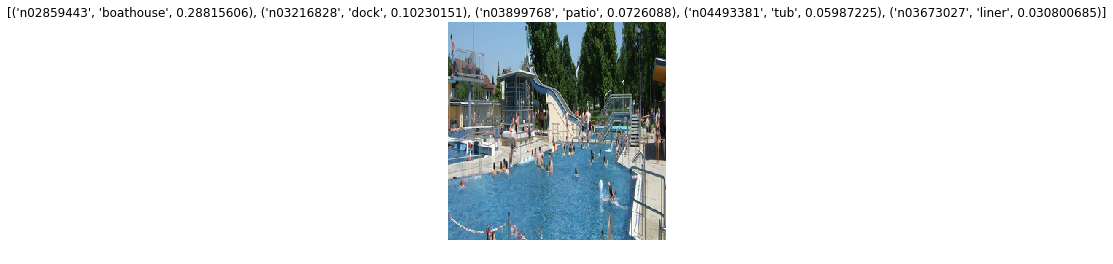

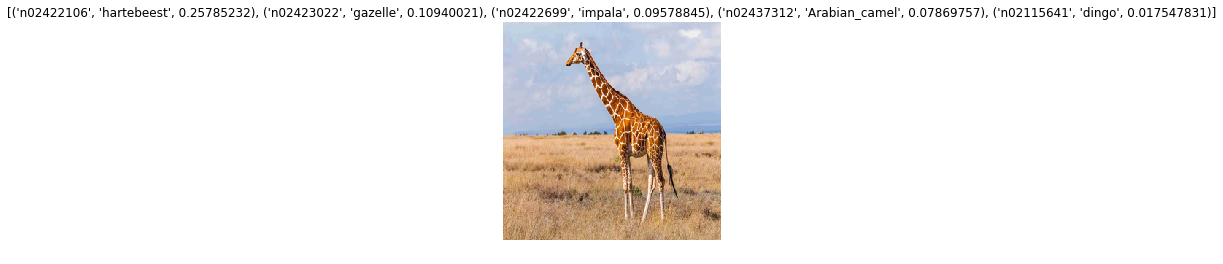

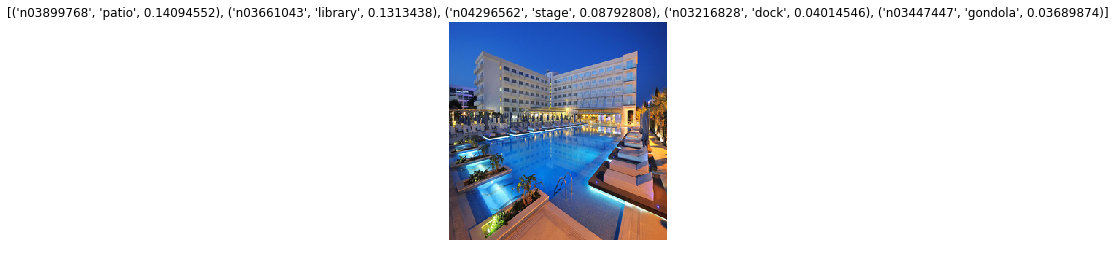

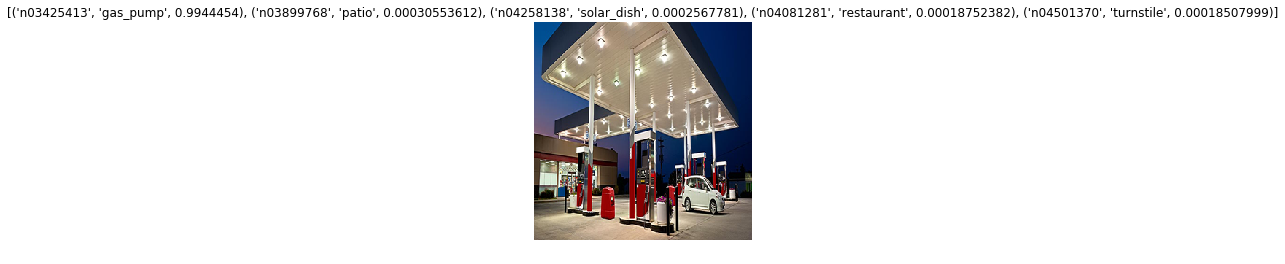

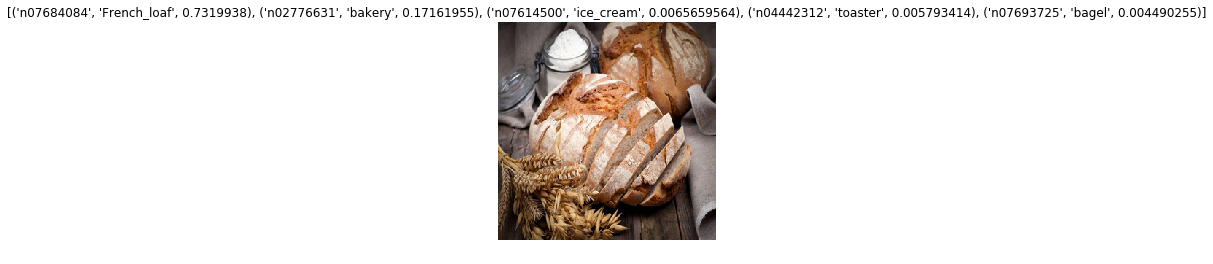

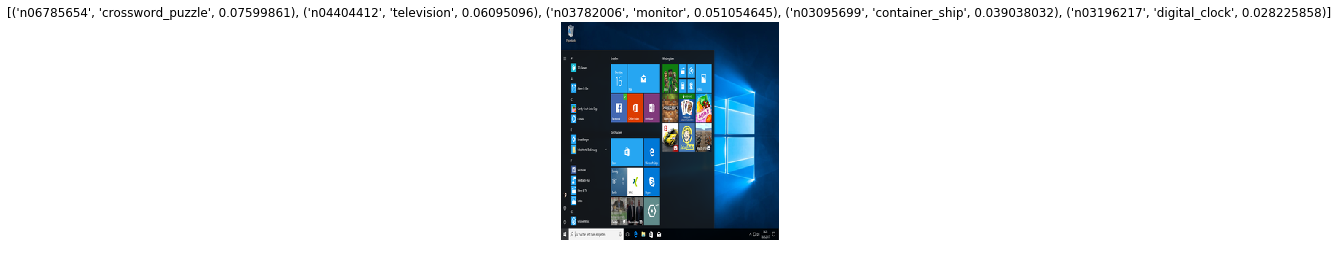

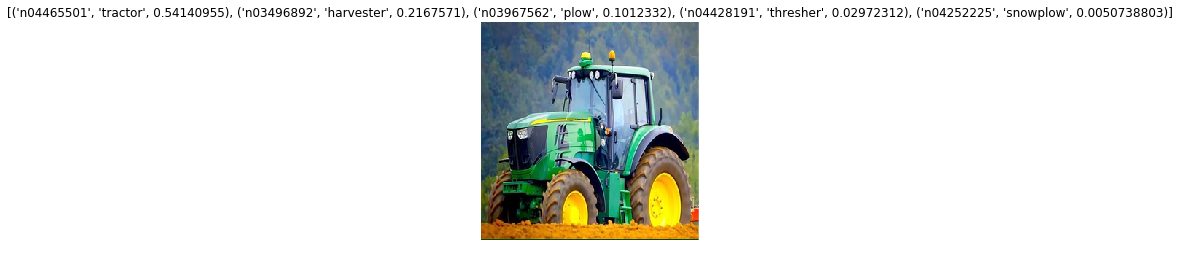

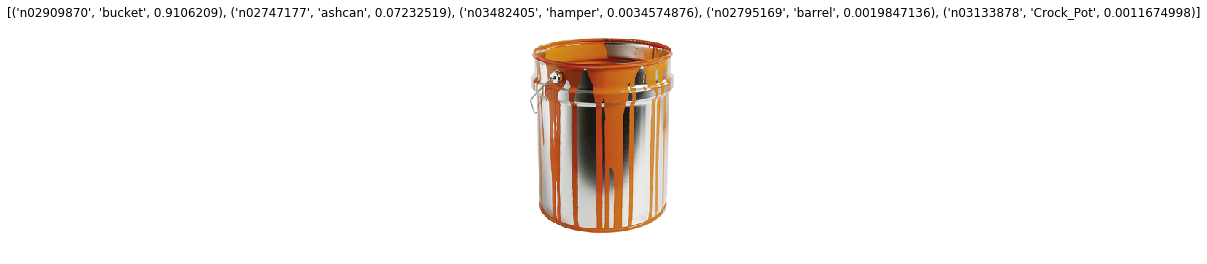

In [18]:
# Optional: Print the images with the predicted classes
#printClassificationResults(preparedImages224x224, predictedClassesVGG16)
#printClassificationResults(preparedImages224x224, predictedClassesVGG19)
#printClassificationResults(preparedImages224x224, predictedClassesMobileNetV2)
#printClassificationResults(preparedImages224x224, predictedClassesResNet50)
#printClassificationResults(preparedImages224x224, predictedClassesDenseNet201)
printClassificationResults(preparedImages299x299, predictedClassesInceptionV3)
printClassificationResults(preparedImages299x299, predictedClassesXception)
printClassificationResults(preparedImages299x299, predictedClassesXception)



In [19]:
resultsList = [predictedClassesVGG16, predictedClassesVGG19, predictedClassesMobileNetV2, predictedClassesResNet50, predictedClassesDenseNet201, predictedClassesInceptionV3]
modelList = ['VGG16', 'VGG19', 'MobileNetV2', 'ResNet50', 'DenseNet201', 'InceptionV3']

# Diese compareResults Methode braucht 4 Parameter:
# 1. Die Liste der Dateinamen
# 2. Die Ergebnisse der einzelnen Modellen, als Array zusammengefasst
# 3. Die Namen der Modelle, einfach als String Array
# 4. Threshold (mind. Sicherheit der Modellvorhersage) => nach Treffen am 17.04. auf 0.0 gesetzt (= kein Filter)
compareResults(foundFiles, resultsList, modelList, 0.00)

Comparing the Results for File: /tmp/image_classification/1/12/cafa1d1daf15db26c2d6a6c76bc2242av1_max_755x425_b3535db83dc50e27c1bb1392364c95a2.jpg
 >  1 . Platz @  VGG16  :  ('n04517823', 'vacuum', 0.31613153)
 >  1 . Platz @  VGG19  :  ('n03187595', 'dial_telephone', 0.92600703)
 >  1 . Platz @  MobileNetV2  :  ('n03187595', 'dial_telephone', 0.94487107)
 >  1 . Platz @  ResNet50  :  ('n03187595', 'dial_telephone', 0.95031273)
 >  1 . Platz @  DenseNet201  :  ('n03187595', 'dial_telephone', 0.9934551)
 >  1 . Platz @  InceptionV3  :  ('n03187595', 'dial_telephone', 0.9971003)
 >  2 . Platz @  VGG16  :  ('n04485082', 'tripod', 0.13461035)
 >  2 . Platz @  VGG19  :  ('n03902125', 'pay-phone', 0.05410716)
 >  2 . Platz @  MobileNetV2  :  ('n03902125', 'pay-phone', 0.003601353)
 >  2 . Platz @  ResNet50  :  ('n03902125', 'pay-phone', 0.034946002)
 >  2 . Platz @  DenseNet201  :  ('n03902125', 'pay-phone', 0.0033560027)
 >  2 . Platz @  InceptionV3  :  ('n03902125', 'pay-phone', 0.00044192